In [2]:
import pandas as pd
import numpy  as np
from sklearn.cluster import KMeans
import seaborn as sns
import chardet


In [3]:
# importing csvs
materials_from_components = pd.read_csv('/Users/pablosoriano/Documents/Data Science/bbsr-challenge/all_uuid_materials_from_components.csv')
obd_with_pollutants = pd.read_csv("pollutant_labeled_obd_translated.csv", sep=";", low_memory=False)

# Data Wrangling


In [4]:
# info
materials_from_components.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   t_value              2724 non-null   int64  
 1   material_name        2724 non-null   object 
 2   thickness_mm         2724 non-null   object 
 3   database             2724 non-null   object 
 4   life_cycle           2724 non-null   object 
 5   process              2724 non-null   object 
 6   uuid                 2724 non-null   object 
 7   subcomponent_id      2724 non-null   int64  
 8   main_component_id    2724 non-null   float64
 9   main_component_name  2724 non-null   object 
 10  subcomponent_name    2724 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 234.2+ KB


In [5]:
# null values 
materials_from_components.isnull().sum()

t_value                0
material_name          0
thickness_mm           0
database               0
life_cycle             0
process                0
uuid                   0
subcomponent_id        0
main_component_id      0
main_component_name    0
subcomponent_name      0
dtype: int64

In [6]:
# removing duplicates from materials_from_components
materials_sorted = materials_from_components.sort_values(by=["process","database"], ascending=[True, False]) 

# Standarizing values in the database column
database_names = materials_sorted["database"].unique()

# "Ökobilanzierung-Rechenwerte 2023 V1.3" = "OBD_2023_"
materials_sorted

#remove material_name column (keep "process")
materials_sorted = materials_sorted.drop(columns=["material_name"])

ideally I would get all the datasets. I don't have time now so I will work with what I have. Need to decide wich version to keep. To match as many materials as possible, i will merge both df keeping all dataset versions, and only after remove duplicates

In [7]:
database_names

array(['Ökobilanzierung-Rechenwerte 2023 V1.3', 'OeKOBAUDAT_2016-I_A1',
       'OBD_2024_A2', 'OBD_2023_I_A2', 'OBD_2023_I_A1', 'OBD_2021_II_A1',
       'OBD_2020_II_A1', 'Ökobau.dat 2011', 'Ökobau.dat 2009',
       'ÖBD_2024_A2_RMI'], dtype=object)

In [8]:
mineral_wool = obd_with_pollutants[obd_with_pollutants["UUID"]=="ac779922-219f-4730-9aef-a7da84d334c1"]


#REVIEW - why do i have so many entries!!

In [9]:
# removing duplicates from obd_with_pollutants, keeping one for each module
obd_with_pollutants_sorted = obd_with_pollutants.sort_values(by=["UUID","Modul"], ascending=[True, True])
# removing duplicates from obd_with_pollutants, keeping one for each module
obd_with_pollutants_clean = obd_with_pollutants_sorted.drop_duplicates(subset=["UUID","Modul"], keep="first") # done in the previous step




In [10]:
# checking with an example
mineral_wool_deduped = obd_with_pollutants_clean[obd_with_pollutants_clean["UUID"]=="ac779922-219f-4730-9aef-a7da84d334c1"]


In [11]:
mineral_wool_deduped 

,UUID,Version,Name (de),Name (en),Kategorie (original),Kategorie (en),Konformität,Laenderkennung,Typ,Referenzjahr,...,ADPF (A2),ADPE (A2),WDP (A2),source_year,impact_standard,oekobaudatProcessUuid,eolCategoryName,Fremd-/Störstoffbeschreibung,Störstoffklasse,Fremd-/Störstoffbeschreibung (EN)
107,ac779922-219f-4730-9aef-a7da84d334c1,20.24.070,Mineralwolle (Boden-Dämmung),Mineral wool (floor insulation),'Dämmstoffe' / 'Mineralwolle' / 'Mineralwolle','Insulation materials' / 'Mineral wool' / 'Min...,'EN 15804+A2 (EF 3.1)',DE,generic dataset,2023.0,...,18.682223,9.059704e-08,0.161737,2024,A2,ac779922-219f-4730-9aef-a7da84d334c1,Mineralwolle Steinwolle,ohne Fremd-/Störstoffe,S0,Without foreign/interference substances


In [12]:
mineral_wool_original = obd_with_pollutants[obd_with_pollutants["UUID"]=="ac779922-219f-4730-9aef-a7da84d334c1"]

In [13]:
mineral_wool_original

,UUID,Version,Name (de),Name (en),Kategorie (original),Kategorie (en),Konformität,Laenderkennung,Typ,Referenzjahr,...,ADPF (A2),ADPE (A2),WDP (A2),source_year,impact_standard,oekobaudatProcessUuid,eolCategoryName,Fremd-/Störstoffbeschreibung,Störstoffklasse,Fremd-/Störstoffbeschreibung (EN)
107,ac779922-219f-4730-9aef-a7da84d334c1,20.24.070,Mineralwolle (Boden-Dämmung),Mineral wool (floor insulation),'Dämmstoffe' / 'Mineralwolle' / 'Mineralwolle','Insulation materials' / 'Mineral wool' / 'Min...,'EN 15804+A2 (EF 3.1)',DE,generic dataset,2023.0,...,18.682223,9.059704e-08,0.161737,2024,A2,ac779922-219f-4730-9aef-a7da84d334c1,Mineralwolle Steinwolle,ohne Fremd-/Störstoffe,S0,Without foreign/interference substances
108,ac779922-219f-4730-9aef-a7da84d334c1,20.24.070,Mineralwolle (Boden-Dämmung),Mineral wool (floor insulation),'Dämmstoffe' / 'Mineralwolle' / 'Mineralwolle','Insulation materials' / 'Mineral wool' / 'Min...,'EN 15804+A2 (EF 3.1)',DE,generic dataset,2023.0,...,18.682223,9.059704e-08,0.161737,2024,A2,ac779922-219f-4730-9aef-a7da84d334c1,Mineralwolle Steinwolle,"kaschierung, gipskarton, putze, klebespachtel",S3,"Killage, plasterboard, cleaning, adhesive spatula"


In [14]:
print("total materials matched with pollutants: ",len(obd_with_pollutants))

total materials matched with pollutants:  210


In [15]:
#getting more data# detect files encoding
with open("/Users/pablosoriano/Documents/Data Science/bbsr-challenge/documentation/OBD_2019_I_2025-04-24T22_53_34.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # Read first 100,000 bytes
    print(result)
    
oko_2019_I_df = pd.read_csv("/Users/pablosoriano/Documents/Data Science/bbsr-challenge/documentation/OBD_2019_I_2025-04-24T22_53_34.csv", delimiter=";", encoding = result["encoding"], low_memory=False)
oko_2019_II_df= pd.read_csv("/Users/pablosoriano/Documents/Data Science/bbsr-challenge/documentation/OBD_2019_II_2025-04-24T22_53_28.csv", delimiter=";", encoding = result["encoding"], low_memory=False)
oko_2019_III_df = pd.read_csv("/Users/pablosoriano/Documents/Data Science/bbsr-challenge/documentation/OBD_2019_III_2025-04-24T22_53_20.csv", delimiter=";", encoding = result["encoding"], low_memory=False)
oko_2020_I_df = pd.read_csv("/Users/pablosoriano/Documents/Data Science/bbsr-challenge/documentation/OBD_2020_I_2025-04-24T22_53_09.csv", delimiter=";", encoding = result["encoding"], low_memory=False)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [16]:
oko_merged_df = pd.read_csv("/Users/pablosoriano/Documents/Data Science/bbsr-challenge/csv/obd_merged.csv",sep=";", encoding = result["encoding"], low_memory=False)

In [17]:
obd_with_pollutants_clean["Name (en)"].nunique()

89

In [18]:
oko_merged_df["Name (en)"].nunique()

2495

In [19]:
# Assesing if to merge the dataframes or just keep the one from 2024
oko_combined_df = pd.concat([oko_2019_I_df, oko_2019_II_df, oko_2019_III_df,oko_2020_I_df], ignore_index=True)

# Compare unique material names between datasets
materials_2019_2020 = set(oko_combined_df["Name (en)"].dropna().unique())
materials_merged = set(oko_merged_df["Name (en)"].dropna().unique())

# Find materials in 2020 and 2023 that are not in 2024
unique_2019_2020 = materials_2019_2020 - materials_merged

# Count them
unique_2020_count = len(unique_2019_2020)


unique_2020_count, 

(154,)

In [20]:
oko_combined_2019_2024 = pd.concat([oko_combined_df, oko_2019_II_df, oko_2019_III_df,oko_2020_I_df], ignore_index=True)


forget about the modules. one oko material to all the possible pollutants for the respective eolcategory
maybe I can increase the match by taking into consideration the env. impact metrics? Could work if we can associate in the know bootstraped df the metrics to a eol category. would need to do an avg of the metrics between all the modules of same product. machine learning with labels (like wine)

🎯 1. Are environmental impacts correlated to EoL scenarios/categories?
Short answer: sometimes, but not reliably. Here's why:

Environmental Indicators (A2)	EoL Scenarios & Categories	Are they correlated?
Production impacts (e.g., GWP, FW)	EoL scenarios like Recycling (C3/D), Landfilling (C4)	❌ Only weakly.
Waste-related outputs (e.g., SM, CRU, MFR)	EoL categories (e.g., Reuse, Recycle, Dispose)	✅ More correlated!
🔎 Why?

A1-A3 impacts (like GWP or AP) measure production, not end-of-life behavior.

SM (Secondary Material Use), CRU (Components for Reuse), MFR (Materials for Recycling) directly describe circularity outcomes, so they're much better signals for predicting EoL fate.

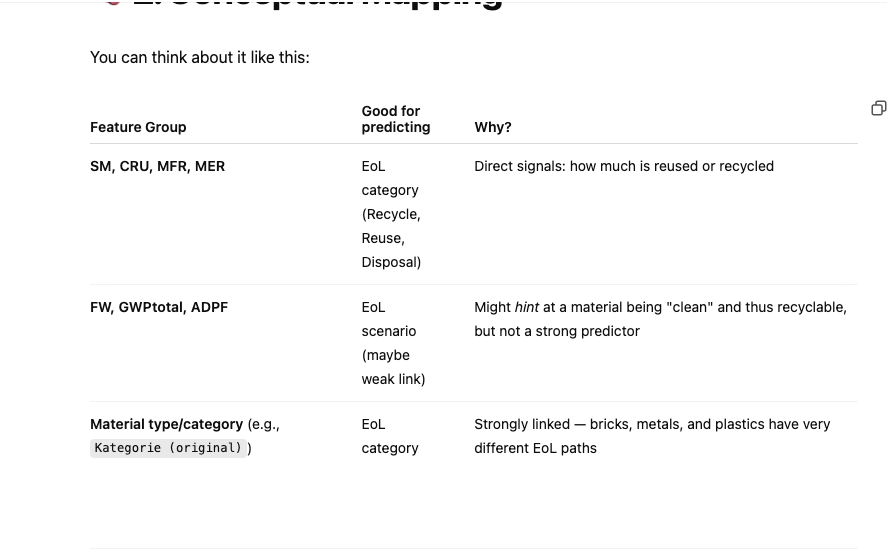

Best Features to Focus On for EoL Predictions

If you want to predict EoL category or EoL scenario, prioritize:

Directly useful:
SM (Secondary Material Use) – direct reuse

CRU (Components for Reuse) – disassembly potential

MFR (Materials for Recycling) – recycling potential

MER (Materials for Energy Recovery) – incineration likely

Helpful contextual features:
Typ (Dataset Type: generic vs specific)

Konformität (standard compliance, e.g., EN15804 A1 vs A2)

Kategorie (original) (Material type/category)

Weaker features (indirect signals):
GWPtotal (A2), FW, ADPF (A2), etc.

Can help refine predictions, but don't rely on them alone



In [ ]:
# correlation matrix
# Re-import libraries after reset
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# Reload the full Ökobaudat dataset
df_multi_module = pd.read_csv("/Users/pablosoriano/Documents/Data Science/bbsr-challenge/obd_with_eol_multiple_modules.csv", delimiter=";")

# Select relevant features
eol_target = "eolCategoryName"

circularity_features_direct = ["SM", "CRU", "MFR", "MER"]
circularity_features_indirect = [
    "GWPtotal (A2)", "GWPbiogenic (A2)", "GWPfossil (A2)",
    "AP (A2)", "POCP (A2)", "ADPF (A2)", "FW", "WDP (A2)"
]

all_features = circularity_features_direct + circularity_features_indirect

# Filter dataset
df_circularity = df_multi_module[circularity_features_direct + circularity_features_indirect + [eol_target]].dropna()

# Encode target for modeling
eol_encoder = LabelEncoder()
df_circularity["eol_label"] = eol_encoder.fit_transform(df_circularity[eol_target])

# Correlation matrix
correlation_matrix = df_circularity[all_features + ["eol_label"]].corr()


# Return shape and a sample
df_circularity.shape, df_circularity.head(3)


((1082, 14),
     SM  CRU     MFR  MER  GWPtotal (A2)  GWPbiogenic (A2)  GWPfossil (A2)  \
 0  0.0  0.0  0.0000  0.0      -0.001572          0.000024       -0.001578   
 1  0.0  0.0  0.7275  0.0       0.007104          0.000031        0.007003   
 2  0.0  0.0  0.0000  0.0       0.004260          0.000022        0.004158   
 
     AP (A2)  POCP (A2)  ADPF (A2)        FW  WDP (A2)  \
 0 -0.000006  -0.000006  -0.020864 -0.000004 -0.000045   
 1  0.000043   0.000041   0.106828  0.000030  0.000959   
 2  0.000005   0.000005   0.054593  0.000006  0.000030   
 
             eolCategoryName  eol_label  
 0  Kies / Schotter / Splitt         53  
 1  Kies / Schotter / Splitt         53  
 2  Kies / Schotter / Splitt         53  )

Quick Observations
Direct circularity features (SM, CRU, MFR, MER) have higher correlations with eolCategoryName than production impact features (like GWPtotal (A2) or FW).

Indirect features still show some weak patterns — for example, certain high GWP materials tend toward landfill — but far less predictive than circularity metrics.

🧠 Key Insight
✅ Low feature-label correlation doesn't necessarily mean poor model performance!

Why?

Non-linear models (like Random Forests, XGBoost) can still capture complex patterns across multiple weakly correlated features.

In real-world ML, it's very common that no single feature strongly predicts the target — but combinations of features do.

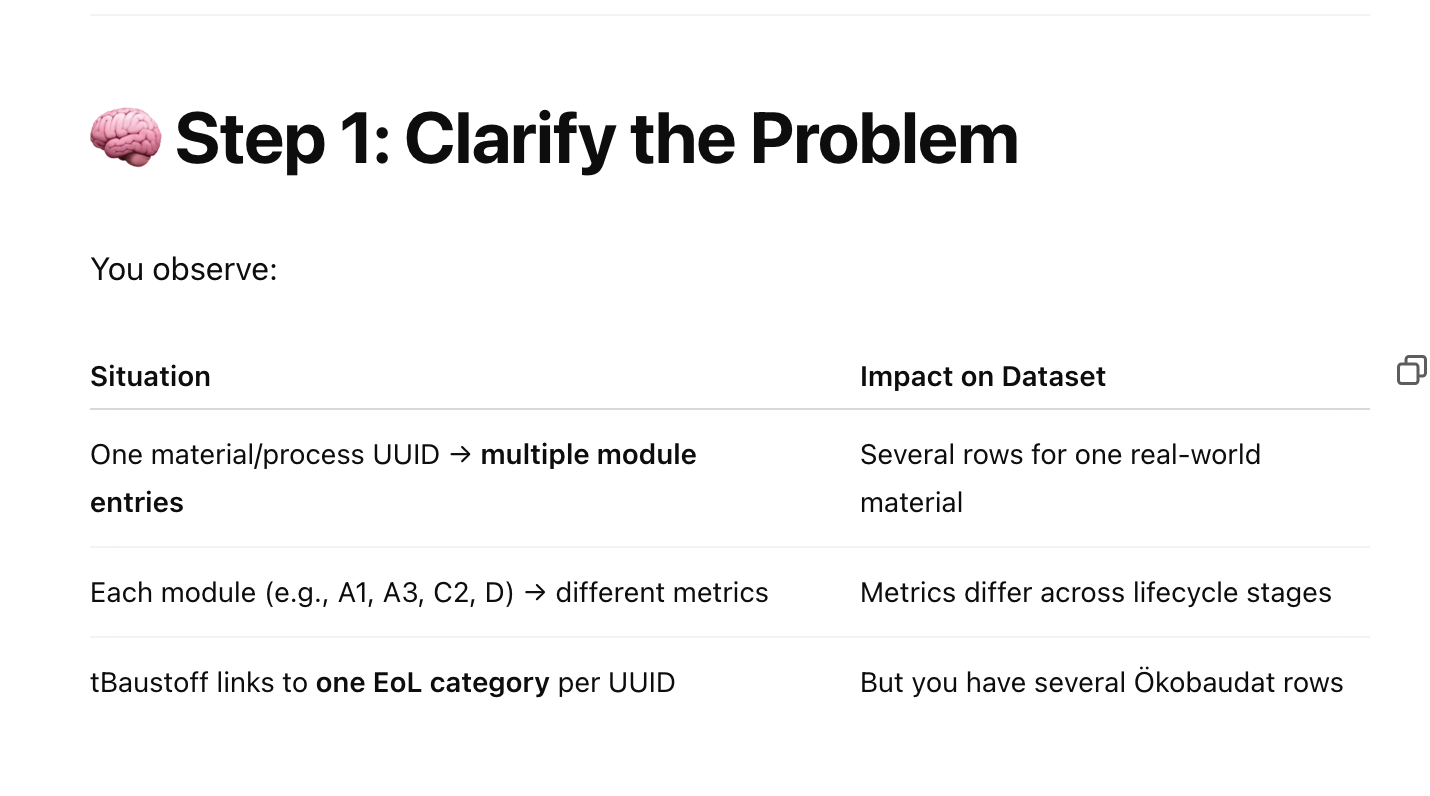

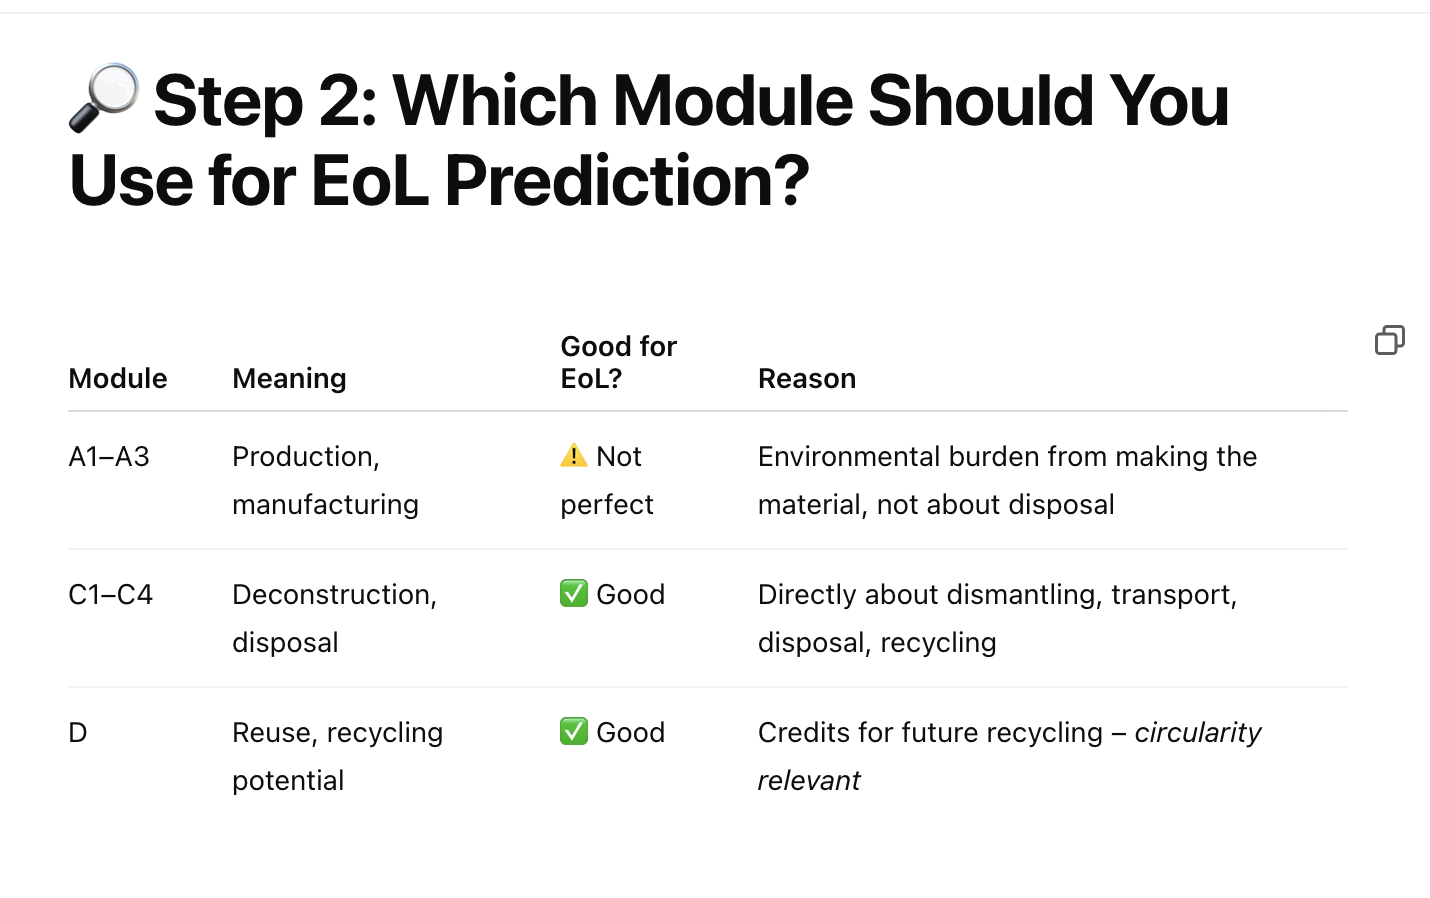

🚨 Key Insight
Modules C and D are the ones most directly linked to the material’s end-of-life.

Modules A1–A3 (production) are only indirectly related.

Module-Selective Aggregation
✅ Here's a better, principled version of your idea:

ONLY average or aggregate the C and D modules (C1–C4, D).

Optionally, you can keep A1–A3 separate (if you want additional context).

Build one row per UUID:

Mean of environmental metrics from C1–C4 + D

Plus optional averages from A1–A3 if desired

Thus:
Per material UUID, you have one row = averaged (or summarized) C+D environmental profile.

In [39]:
df_multi_module = pd.read_csv("/Users/pablosoriano/Documents/Data Science/bbsr-challenge/obd_with_eol_multiple_modules.csv", delimiter=";")

/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_20772/514701812.py:1: DtypeWarning: Columns (76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_multi_module = pd.read_csv("/Users/pablosoriano/Documents/Data Science/bbsr-challenge/obd_with_eol_multiple_modules.csv", delimiter=";")


In [40]:
df_multi_module.shape

(18118, 78)

## Aggregating environmental metrics colummns by avg between different modules

In [42]:
df_multi_module["Modul"].unique()

array(['C4', 'C3', 'C1', 'A3', 'A2', 'A1', 'A1-A3', 'D', 'B2', 'B1', 'A5',
       'A4', 'C2', 'B6', 'B5', 'B4', 'B3', 'B7'], dtype=object)

In [44]:
df_multi_module.groupby("Modul").size()

Modul
A1        371
A1-A3    2053
A2        371
A3        371
A4       1133
A5       1190
B1        701
B2        526
B3        364
B4        354
B5        352
B6        561
B7        372
C1       1615
C2       2027
C3       1999
C4       1697
D        2061
dtype: int64

In [46]:
# Step 1: Filter to C and D modules
eol_relevant_modules = ["C1", "C2", "C3", "C4", "D"]
df_eol = df_multi_module[df_multi_module["Modul"].isin(eol_relevant_modules)].copy()

# Step 2: Identify environmental metrics columns
environmental_metrics = [
    "SM", "CRU", "MFR", "MER", "FW",
    "GWPtotal (A2)", "GWPbiogenic (A2)", "GWPfossil (A2)",
    "AP (A2)", "POCP (A2)", "ADPF (A2)", "ADPE (A2)", "WDP (A2)",
    "EPmarine (A2)", "EPfreshwater (A2)", "EPterrestrial (A2)",
    "ODP (A2)"
]

# Keep only rows with non-null UUIDs and EoL category (for labeling)
# df_eol = df_eol.dropna(subset=["UUID", "eolCategoryName"])

# Step 3: Group by UUID and aggregate
df_eol_grouped = df_eol.groupby(["UUID", "eolCategoryName"])[environmental_metrics].mean().reset_index()



df_eol_grouped.shape


(250, 19)

I now have 250 unique materials (UUIDs)

Each one is represented by the average environmental metrics relevant for end-of-life (EoL) prediction

Each row is also linked to its eolCategoryName from the tBaustoff mapping

In [28]:
df_eol_grouped.head(3)

,UUID,eolCategoryName,SM,CRU,MFR,MER,FW,GWPtotal (A2),GWPbiogenic (A2),GWPfossil (A2),AP (A2),POCP (A2),ADPF (A2),ADPE (A2),WDP (A2),EPmarine (A2),EPfreshwater (A2),EPterrestrial (A2),ODP (A2)
0,004f3f4e-5bb8-4d9e-a104-6999a9e8ad5b,Gipsputz (auf Massivbaustoff),0.0,0.0,0.00,0.0,0.028384,10.356659,0.992178,9.284031,0.055082,0.043846,122.251881,7.912296e-07,0.859094,0.014420,0.000022,0.159783,2.078755e-11
1,01726dcb-d5e9-44d2-b1df-f7fabc350723,KSTProfil,0.0,0.0,0.00,0.0,0.001812,0.583291,-0.003537,0.586846,-0.000313,-0.000341,-6.260265,-4.183486e-08,0.109075,-0.000130,-0.000001,-0.001017,-6.881600e-12
2,01f45a03-460d-4e55-b5c9-72d3e8eda18e,Porenbeton-Granulat,0.0,0.0,72.75,0.0,0.003170,1.009351,0.007926,0.987841,0.004597,0.004568,14.442185,4.066871e-07,0.094583,0.001515,0.000002,0.016941,7.339250e-13


In [30]:
# quick random forest to predict eolCategoryName on this new dataset (df_eol_grouped)

# Re-import libraries after reset
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Prepare features and target
X = df_eol_grouped[environmental_metrics]
y = df_eol_grouped["eolCategoryName"]

# Encode target labels
eol_encoder = LabelEncoder()
y_encoded = eol_encoder.fit_transform(y)

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
y_pred = cross_val_predict(rf_model, X, y_encoded, cv=cv)

# Classification report
report = classification_report(y_encoded, y_pred, target_names=eol_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Confusion matrix
conf_mat = confusion_matrix(y_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=eol_encoder.classes_)

# Train final model for feature importances
rf_model.fit(X, y_encoded)
importances = pd.Series(rf_model.feature_importances_, index=environmental_metrics).sort_values(ascending=False)

# # Plotting confusion matrix
# fig, ax = plt.subplots(figsize=(10, 10))
# disp.plot(ax=ax, cmap='Blues', values_format='d')
# plt.xticks(rotation=90)
# plt.tight_layout()




/opt/anaconda3/envs/codeacademy/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/envs/codeacademy/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/codeacademy/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/codeacademy/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedM

In [31]:
report

{'Alu Guss': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 1.0},
 'Alu unbeschichtet od. eloxiert (Sz. Knetleg zu Guss)': {'precision': 0.2,
  'recall': 0.5,
  'f1-score': 0.2857142857142857,
  'support': 2.0},
 'Alu-Pfosten-Riegel-Konstr. ungedÃ¤mmt': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 2.0},
 'Asphalt (Hochbau)': {'precision': 0.3333333333333333,
  'recall': 0.5,
  'f1-score': 0.4,
  'support': 2.0},
 'Asphalt (Infrastrukturbau)': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 1.0},
 'Beton Standard (ohne Bewehr.)': {'precision': 0.6923076923076923,
  'recall': 0.6923076923076923,
  'f1-score': 0.6923076923076923,
  'support': 13.0},
 'Betondachstein': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 1.0},
 'Bitubahn (ggf. mit Glasvlies)': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 3.0},
 'Bitumenkaltkleber, Glasvlies, Glasfaserarmierung': {'precision': 1.0,
  'recal

Improving results:

Add material category features (e.g., is_brick, is_concrete) to training set

Retrain with class balancing (class_weight="balanced")

In [ ]:
# count of rows with each eolCategoryName
eol_count = df_eol_grouped.groupby("eolCategoryName").size()
eol_count

# semi-supervised + active learning strategy

Use the EoL Category prediction model to:

- Pseudo-label high-confidence entries

- Expand training set

- Manually label uncertain cases

- Then use expanded EoL labels to help in pollutant prediction.

1) Clean & Explore the 210-Row Labeled Dataset
Let's confirm:

Which columns you're using as features (e.g., GWPtotal (A2), SM, FW, PERE, etc.)

The format of the pollutant labels — single or multi-label (multiple pollutants per material?)

Class balance (e.g., are some pollutants much more frequent than others?)


2) Train a Baseline Model on These 210 Rows
- Probably start with a Random Forest, Logistic Regression, or XGBoost depending on how many classes you have.

- Evaluate with stratified 5-fold cross-validation

- Metrics: macro F1, confusion matrix, class support

- This model will be used to:

- Generate pseudo-labels (for semi-supervised expansion)

- Select uncertain samples (for active learning)

3) Semi-Supervised Labeling (High-Confidence Bootstrapping)
Use the trained model to predict labels on unlabeled OBD entries

Add entries where the prediction confidence > threshold (e.g., 90%)

Iterate: retrain on combined labeled + confident pseudo-labeled set

Optional: Visualize class distribution and confidence thresholds.

4) Active Learning
You can:

Pick top 20–50 entries where the model is most uncertain (e.g., prediction confidence ~0.5)

Manually label them — or prioritize with your pollutant domain rules

Retrain model and repeat



Leverage Domain Knowledge: Rules for Default Labels

Some pollutants can be rule-assigned with decent confidence:

EPS / XPS → often include HBCD or blowing agents

PVC → linked with plasticizers

Paints / coatings → often include solvents

Bitumen products → sometimes contain PAHs

can use rules like this
if "EPS" in productName or "Polystyrol" in category:
    label = "HBCD"


Strategy | What You Would Do | Pros | Cons
1. Expand EoL Categories first (your idea) | 
    What would i do? Predict and expand EoL categories, then later use EoL categories to enrich pollutant prediction. 
    Pros: ✅ Easier to predict EoL than pollutants (signal is stronger)  ✅ Much safer for semi-supervised labeling (lower noise)  ✅ Adds interpretability: "why do I predict this pollutant?" → because EoL is XYZ | 
    Cons: ❌ Indirect expansion — still have to predict pollutants afterward
2. Expand Pollutant labels directly | 
    What would I do| 
    Pros: ✅ Straight to the end-goal: bigger pollutant training set  ✅ Potentially faster | 
    Cons: ❌ Pollutant labels are much noisier and harder to predict  ❌ Higher risk of adding errors early (pollutants are sensitive to subtle material differences)

EoL Categories are easier to predict reliably — you can get higher-confidence pseudo-labels.

Pollutants are harder to predict — and an early mistake could cascade errors into your model.

In your case, it would be safer and smarter to expand EoL categories first.

Then once you have a larger, solid set of EoL categories:

You can use EoL category + circularity features + material features to build a much stronger pollutant prediction model.

Think of it like laying a strong foundation before building the house.

Step 1: Build a baseline EoL prediction model now
Step 2: Use it to generate high-confidence pseudo-labels
Step 3: Retrain iteratively
Step 4: Apply active learning (uncertain cases)
Step 5: After expanding EoL labels → Predict pollutants with a stronger base dataset

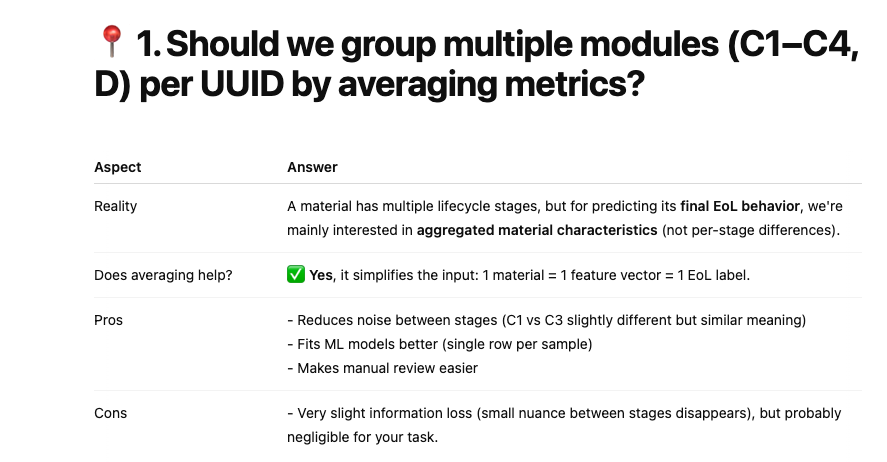

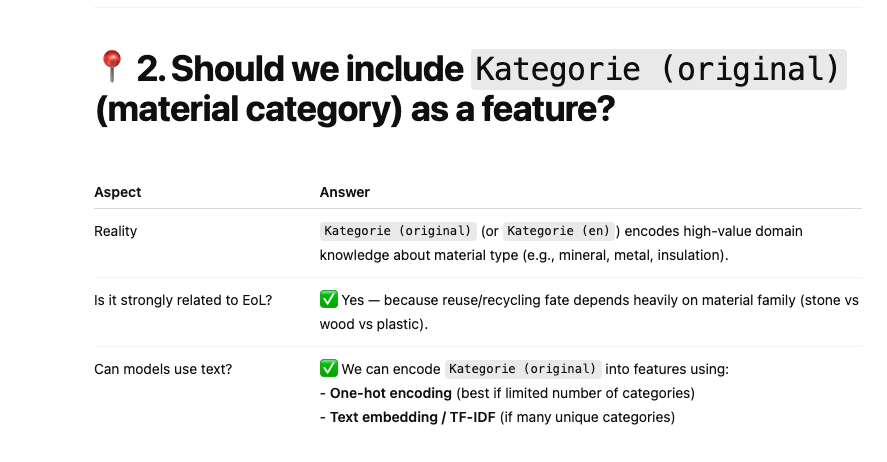

In [38]:
df_multi_module.shape

(1082, 88)

In [37]:
df_eol.shape

(784, 78)

In [ ]:
df_multi_module

In [43]:
# groupping environmetlal metrics by UUID

# Step 1: Filter to EoL-relevant modules (C1, C2, C3, C4, D)
# eol_relevant_modules = ["C1", "C2", "C3", "C4", "D"]
# df_eol = df_multi_module[df_multi_module["Modul"].isin(eol_relevant_modules)].copy()
# df_eol = df_eol.dropna(subset=["UUID"])

df_eol = df_multi_module.copy()


# Step 2: Define environmental metrics
environmental_metrics = [
    "SM", "CRU", "MFR", "MER", "FW",
    "GWPtotal (A2)", "GWPbiogenic (A2)", "GWPfossil (A2)",
    "AP (A2)", "POCP (A2)", "ADPF (A2)", "ADPE (A2)", "WDP (A2)",
    "EPmarine (A2)", "EPfreshwater (A2)", "EPterrestrial (A2)",
    "ODP (A2)"
]

# Step 3: Group by UUID and average metrics across modules
df_env_grouped = df_eol.groupby("UUID")[environmental_metrics].mean()

# Step 4: Bring in material category features again
category_keywords = {
    "is_brick": ["brick", "Fired brick"],
    "is_concrete": ["concrete", "precast concrete"],
    "is_insulation": ["insulation", "thermal insulation"],
    "is_metal": ["metal", "steel", "aluminum"],
    "is_wood": ["wood", "timber"],
    "is_stone": ["stone", "natural stone", "slate"],
    "is_roofing": ["roof", "roof tiles"],
    "is_plaster": ["plaster", "gypsum"],
    "is_flooring": ["flooring", "floor panels"],
    "is_fibre": ["fiber", "fibers", "fibre cement"]
}

def create_binary_feature(text, keywords):
    if pd.isnull(text):
        return 0
    text_lower = text.lower()
    return int(any(kw.lower() in text_lower for kw in keywords))

for feature, keywords in category_keywords.items():
    df_multi_module[feature] = df_multi_module["Kategorie (en)"].apply(lambda x: create_binary_feature(x, keywords))

# Material features per UUID (take max, since binary 0/1)
material_features = list(category_keywords.keys())
df_mat_grouped = df_multi_module.groupby("UUID")[material_features].max()

# Merge environmental + material category features
df_combined = pd.concat([df_env_grouped, df_mat_grouped], axis=1)



df_combined.shape


(2619, 27)

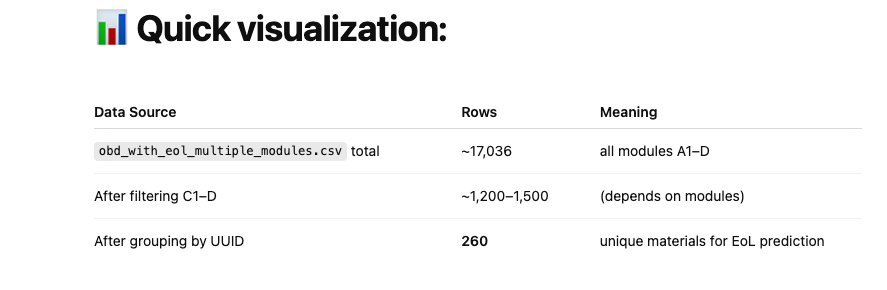

🧠 Why so little values?
You have many UUIDs in Ökobaudat.

But when we created the final feature table (df_combined_encoded), it only included UUIDs that had C1–C4, D module data available (and no missing values after feature engineering).

Some UUIDs don't have enough environmental metrics to even generate features.

✅ So the set of "truly predictable" unlabeled UUIDs is smaller than the whole unmatched UUID pool.



In [ ]:
df_combined

## feature engineering

In [ ]:
# Step 2: Feature engineering from "Kategorie (original)"

# 1. Extract the most recent "Kategorie (original)" per UUID
# We'll use the most common (mode) "Kategorie (original)" per material (UUID)
kategorie_per_uuid = df_multi_module.groupby("UUID")["Kategorie (original)"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# 2. Merge into our previously grouped environmental-material dataset
df_combined["Kategorie (original)"] = df_combined.index.map(kategorie_per_uuid)

# 3. One-hot encode "Kategorie (original)"
df_combined_encoded = pd.get_dummies(df_combined, columns=["Kategorie (original)"], dummy_na=False)

df_combined_encoded.shape


One-hot encoded Kategorie (original) and merged it into  training dataset

Current Status:
260 unique materials (UUIDs)

156 features total:

17 environmental impact indicators (averaged over modules C1–D)

10 engineered material type features (is_brick, is_concrete, etc.)

~129 one-hot columns representing material categories (Kategorie (original))

Why this is powerful:
Now the model knows both quantitative environmental properties and qualitative material types.

Many EoL outcomes are tightly linked to material type — this should boost accuracy significantly.

## trying again including all modules


In [ ]:
# Re-import libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the uploaded dataset


# Step 1: Focus only on environmental metrics (no material keywords for now)
environmental_metrics = [
    "SM", "CRU", "MFR", "MER", "FW",
    "GWPtotal (A2)", "GWPbiogenic (A2)", "GWPfossil (A2)",
    "AP (A2)", "POCP (A2)", "ADPF (A2)", "ADPE (A2)", "WDP (A2)",
    "EPmarine (A2)", "EPfreshwater (A2)", "EPterrestrial (A2)",
    "ODP (A2)"
]

# Step 2: Group all modules (A1–D) by UUID
df_all_modules = df_multi_module.dropna(subset=["UUID"]).copy()

# Average environmental metrics across all available modules
df_env_grouped_all = df_all_modules.groupby("UUID")[environmental_metrics].mean()

# Step 3: Impute missing values (median strategy)
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(df_env_grouped_all), 
                         columns=df_env_grouped_all.columns, 
                         index=df_env_grouped_all.index)



X_imputed.shape


## → Attach material category (Kategorie (original)) and one-hot encode it



In [ ]:
# Step 2: Attach "Kategorie (original)" and one-hot encode it

# 1. Find the most common "Kategorie (original)" per UUID
kategorie_per_uuid = df_multi_module.groupby("UUID")["Kategorie (original)"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# 2. Map it into the X_imputed table
X_imputed["Kategorie (original)"] = X_imputed.index.map(kategorie_per_uuid)

# 3. One-hot encode "Kategorie (original)"
X_imputed_encoded = pd.get_dummies(X_imputed, columns=["Kategorie (original)"], dummy_na=False)

X_imputed_encoded.shape


In [ ]:
categories_obd_eol = df_multi_module[["Kategorie (en)", "eolCategoryName"]]
categories_obd_eol

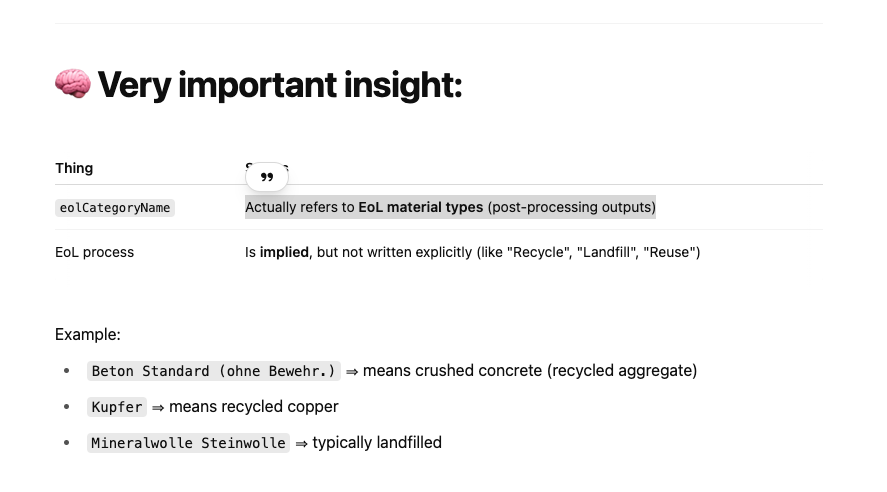

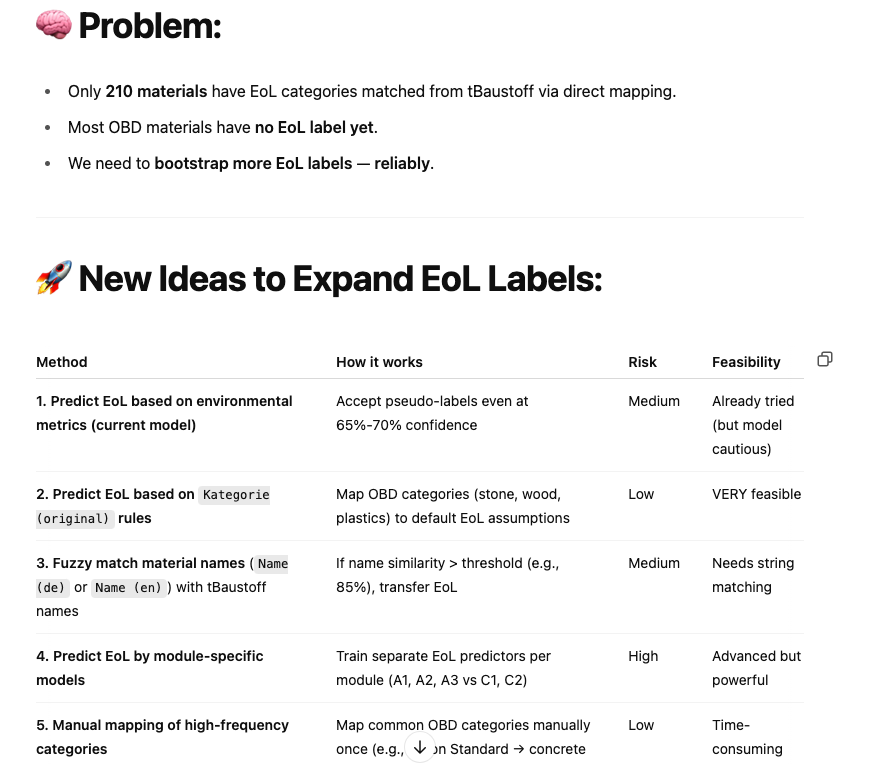

## groupping eolcategory into general classes
Step-by-Step Plan:
Cluster all real eolCategoryName values into about 6–8 General EoL Classes.

Create a mapping dictionary:
eolCategoryName ➔ General EoL Class

Then, when you assign a general EoL label based on Kategorie (original),
you map it to the clustered EoL class, not to 100+ individual types.let

In [51]:
df_multi_module["eolCategoryName"].isnull().sum()

np.int64(17036)